# Lending Club (2007-2010)

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club is P2P lending that connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. The data can be found from [here](https://www.lendingclub.com/info/download-data.action).

Here are what the columns/features represent:
* credit.policy: '1' if the customer meets the credit underwriting criteria of LendingClub.com, and '0' otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## 1) Data Preparation
Importing and understanding the data at glance. It's good to read what's inside each column and its columns' name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [5]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


So there are 9,578 rows of data with 14 columns. The average of interest rate reaches 12,2% which means normal. Notice that the average of monthly installment is 319 months. In my perspective, this is not a small number. These guys in this planet earth have serious business!

## 2) Exploratory Data Analysis (EDA)

Let's do some data visualization!

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

### 2.a) The FICO Credit Score of Borrowers by Credit Criteria

In [13]:
credpol1 = loans['credit.policy'] == 1
credpol1

0        True
1        True
2        True
3        True
4        True
        ...  
9573    False
9574    False
9575    False
9576    False
9577    False
Name: credit.policy, Length: 9578, dtype: bool

In [14]:
credpol0 = loans['credit.policy'] == 0
credpol0

0       False
1       False
2       False
3       False
4       False
        ...  
9573     True
9574     True
9575     True
9576     True
9577     True
Name: credit.policy, Length: 9578, dtype: bool

In [11]:
loans[credpol1]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,home_improvement,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,1
7706,1,small_business,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,1
7707,1,all_other,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,1
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1


In [12]:
loans[credpol1]['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
7705    742
7706    697
7707    737
7708    717
7709    757
Name: fico, Length: 7710, dtype: int64

Text(0.5, 0, 'FICO')

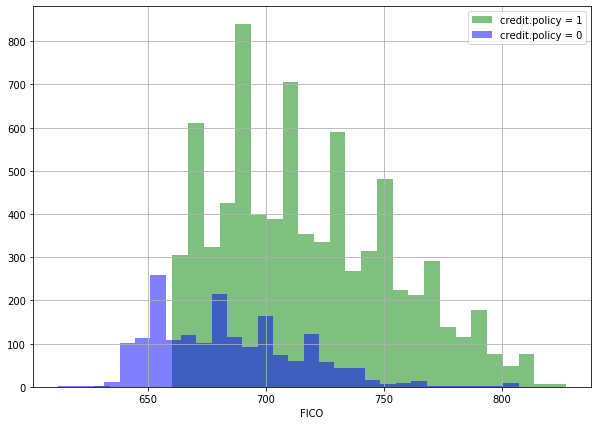

In [17]:
plt.figure(figsize=(10,7))
loans[credpol1]['fico'].hist(alpha = 0.5, color = 'green', bins = 30, label = 'credit.policy = 1')
loans[credpol0]['fico'].hist(alpha = 0.5, color = 'blue', bins = 30, label = 'credit.policy = 0')
plt.legend()
plt.xlabel('FICO')

We see that more than 800 borrowers with FICO score almost 700 are meet the credit underwriting criteria (green), while almost 300 borrowers aren't (blue).

### 2.b) The FICO Credit Score of Borrowers by Fully Paid Status

In [19]:
notfulpaid1 = loans['not.fully.paid'] == 1
notfulpaid0 = loans['not.fully.paid'] == 0

Text(0.5, 0, 'FICO')

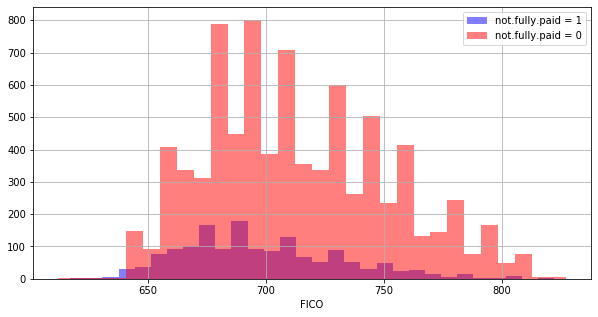

In [20]:
plt.figure(figsize=(10,5))
loans[notfulpaid1]['fico'].hist(alpha=0.5, color='blue', bins = 30, label = 'not.fully.paid = 1')
loans[notfulpaid0]['fico'].hist(alpha=0.5, color='red', bins = 30, label = 'not.fully.paid = 0')
plt.legend()
plt.xlabel('FICO')

Notice there are about 800 borrowers with FICO score of 700 are fully paid back to the lenders, while there are almost 200 borrowers with FICO score almost 700 aren't fully paid.

### 2.c) Purpose of Borrowing

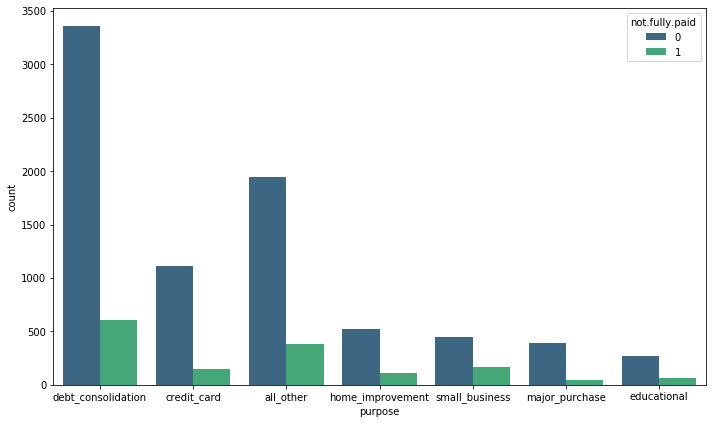

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette = 'viridis')
plt.tight_layout()

We see that most of borrowers' purpose is debt_consolidation and fully paid back, and the least is major_purchase. Notice that mostly borrowers can fully paid back whatever its purpose.

### 2.d) Relationship between FICO score and interest rate.

<Figure size 720x432 with 0 Axes>

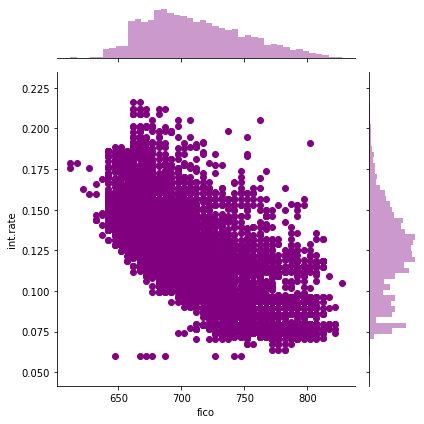

In [28]:
plt.figure(figsize=(10,6))
sns.jointplot(data=loans, x = 'fico', y = 'int.rate', color = 'purple')
plt.tight_layout()

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

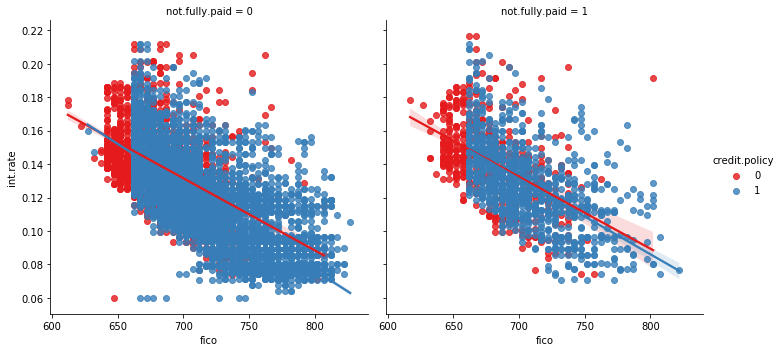

In [61]:
sns.lmplot(data = loans, x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', palette = 'Set1')

We see the downtrend from the above graphs. The interest rate absolutely dependant on FICO credit score. Higher the interest rate, lower the FICO credit score. Lower the interest rate, higher the FICO credit score. It all makes sense since in most P2P lending platform, if you want to get higher interest rate like above 18%, the more you'll get the risk of not fully paid with low FICO credit score. 

## 3) One-hot Encoding on 'Purpose' Feature

Notice that the **purpose** column as categorical. That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [31]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [32]:
cat_feats = ['purpose']

In [42]:
final_data = pd.get_dummies(loans, columns = ['purpose'], drop_first = True)

In [43]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [44]:
final_data.info()

# There are no 'object' dtype anymore.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## 4) Split and Training the Model with Decision Tree Classifier

Now it's the time to split our data into a training set and a testing set! As usual, we are using 30% of the data. Our model will meet the Decision Tree Classifier.

In [37]:
from sklearn.model_selection import train_test_split

In [45]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 5) Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [50]:
pred = dtree.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [52]:
print(confusion_matrix(y_test, pred))

[[2005  426]
 [ 338  105]]


With *Decision Tree Classifier*, Our model was predicted on 'Not Fully Paid' feature, it has:
* Accuracy: 73%
* Precision: 86% on '0' and 20% on '1'
* F1-Score: 84% on '0' and 22% on '1'
* True Positive (TP): 2005
* True Negative (TN): 105
* False Positive (FP): 338
* False Negative (FN): 426

## 6) Split and Training the Model with Random Forest Classifier

We got good result based on the classification report. But how about we're using Random Forest Classifier? Are we getting the worse result or better?

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 7) Predictions and Evaluation with RFC

In [57]:
predrfc = rfc.predict(X_test)

In [59]:
print(classification_report(y_test, predrfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [58]:
print(confusion_matrix(y_test, predrfc))

[[2422    9]
 [ 434    9]]


With *Random Forest Classifier*, Our model was predicted on 'Not Fully Paid' feature, it has:
* Accuracy: 85%
* Precision: 85% on '0' and 50% on '1'
* F1-Score: 92% on '0' and 4% on '1'
* True Positive (TP): 2422
* True Negative (TN): 9
* False Positive (FP): 434
* False Negative (FN): 9

## 8) Conclusion
In the Lending Club, most of the borrowers can fully paid back to the lenders, and they are met the criteria.

Our model can predict the target with 85% of accuracy. Well, it's not surprised since the dataset is consist more of 'fully paid' rather than 'not fully paid'. But still, it is nice to have the number 85. Anyway, in this case the Random Forest method is better than Decision Tree Classifier.